In [1]:
#PREDICTING SURVIVAL ON THE TITANIC
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
titanic_train=pd.read_csv('titanic_train.csv')

In [9]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_train.describe()  #Sissp: sibling & spouses , Parch=parents And children

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#Let's start with some exploratory data analysis
#Now we check for some missing data
titanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


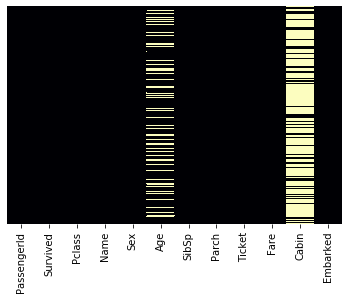

In [19]:
sns.heatmap(data=titanic_train.isnull(),yticklabels=False,cbar=False,cmap='magma') #cbar=False, because we are not doing an actual colorbar
#Now this gives us an idea of what's missing, we can see that roughly 30% of age data is missing
#whereas 

In [20]:
sns.set_style('whitegrid')

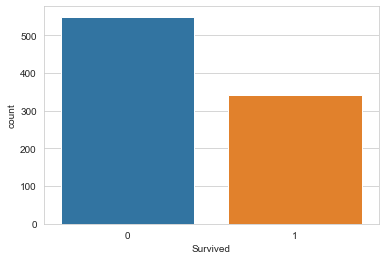

In [22]:
#Lets just visualize a count plot of who survived who did not, for classification problems it is a good idea to see the ratio of actual target labels. 
sns.countplot(x='Survived',data=titanic_train)

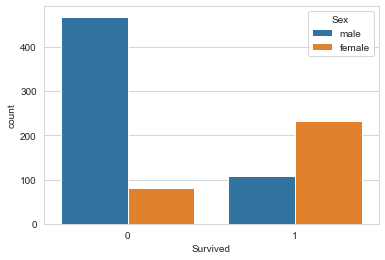

In [23]:
sns.countplot(x='Survived',hue='Sex',data=titanic_train) #survival based on gender

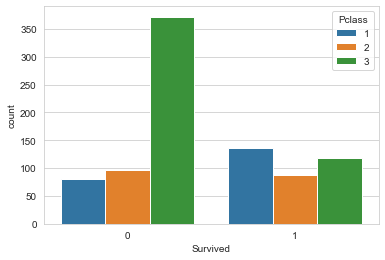

In [24]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_train) #survival based on passenger class

In [41]:
#Lets see what age group was predominantly travelling that day
sns.distplot(titanic_train['Age'].dropna(),kde=False,bins=50)
#HMMM seems like a bimodal plot, with more of the people in the 20-35 age bracket

TypeError: distplot() got an unexpected keyword argument 'hue'

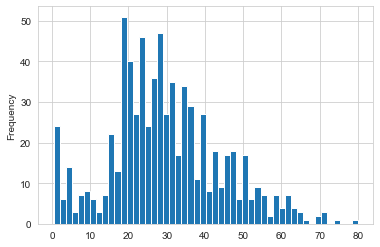

In [40]:
#Well i can use pandas directly for the above thing
titanic_train['Age'].plot.hist(bins=50)

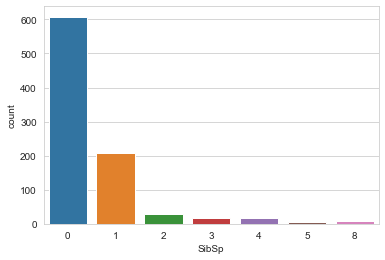

In [30]:
#Now let's get some info about siblings and spouses
sns.countplot(x='SibSp',data=titanic_train)
#Now this shows that most of the people are single on the Ship, no spouse or children.Whereas the rise of y on 1 probably refers to a spouse rather than a a pair of siblings 

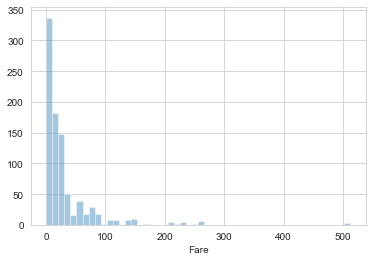

In [33]:
sns.distplot(titanic_train['Fare'],bins=50,kde=False)
#Makes sense that things are distributed towards cheaper fare tickets

In [34]:
#Lets say we want a more informative plot
import cufflinks as cf

In [35]:
cf.go_offline()

In [37]:
titanic_train['Fare'].iplot(kind='hist',bins=40)

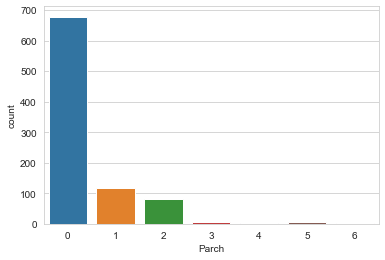

In [38]:
sns.countplot(x='Parch',data=titanic_train) #Info about parents and children



In [42]:
#Now we just went ahead and did some exploratory data anaalysis for some contextual inf0,
#Lets move on to some ML(Logistic Regression)

#Now we saw that some data was missing, basically we need to clean our data to convert it into an acceptable form for our machine learning algorithm.
#say instead of dropping all age rows with null values we can replace them with the mean age, this is called imputation
#WE can do one better by classifying age by passenger class first and taking mean
#Lets see what i am taling about



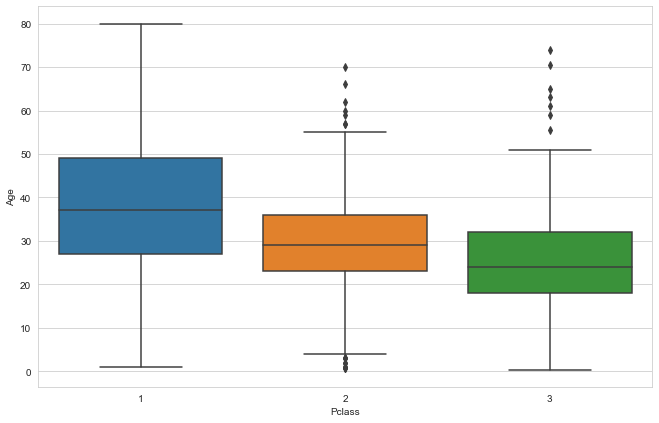

In [46]:
plt.figure(figsize=(11,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_train)

In [51]:
def impute(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 36
        elif(Pclass==2):
            return 29
        else:
            return 25
    else:
        return Age

In [52]:
titanic_train['Age']=titanic_train[['Age','Pclass']].apply(impute,axis=1) #axis=1 as i want to apply this along the column

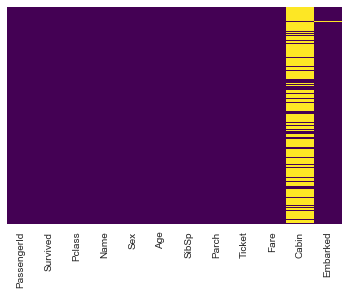

In [54]:
#NOw lets check the heatmap again
sns.heatmap(data=titanic_train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [55]:
#Now we see that the age column has no more missing values

In [56]:
#Now about the cabin column , we hve just too many missing values so we'd better drop this
titanic_train.drop(columns='Cabin',inplace=True,axis=1)

In [57]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


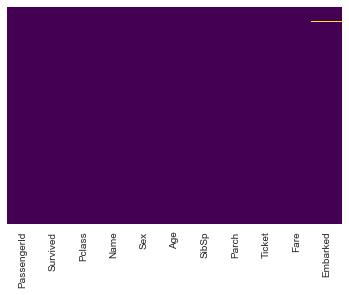

In [58]:
sns.heatmap(data=titanic_train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [60]:
titanic_train.dropna(inplace=True)

In [62]:
#Now we just got done with the first step that is dealing with missing data.
#Now we need to deal with the categorical values, by converting them into dummy variable
#i.e in a form understandable by ML algorithm
#Let's see how we can do that with help of pandas

In [63]:
pd.get_dummies(titanic_train['Sex'])#converts categorical variables into dummy or indicator variables

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [64]:
#Now there is a slight problem here, one coloumn(say male) is a perfect predictor
#of the other coloumn, so we feed our algorithm both columns we'll have something called
#Multi-Co-linearity, which will mess up the algorithm because a bunch of columns will be perfect predictors of another column

In [67]:
#Therefore to tackle the previous problem of multicolinearity
sex=pd.get_dummies(titanic_train['Sex'],drop_first=True)
#Similarly for embarked column
embarked=pd.get_dummies(titanic_train['Embarked'],drop_first=True)

In [68]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [69]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [70]:
titanic_train=pd.concat([titanic_train,sex,embarked],axis=1)

In [71]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [72]:
#We have the replacement coulumns, so we dont need the sex and embarked columns anymore

In [73]:
titanic_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [74]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [77]:
#Loooks absolutely perfect for our Ml algorithm , all data is numerical,evrything concatenated
#one more thing, PassengerId seems a bit redundant doesn't it?? Its basically just index+1??
#and obviously not of much use, as we cannot get some info on survial based on passanegerid.
titanic_train.drop('PassengerId',axis=1,inplace=True)

In [78]:
#Let's look at our cleaned Data
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [79]:
#Another thing to note, if we look carefully, Pclass cloumn seems categorical doesn't it??
#We could have done getdummies on that too
pd.get_dummies(titanic_train['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [80]:
#We'll check it out later once we are done with running the model once , so we
#get to know the difference of what would happen diffrently

In [81]:
#Now we are going to train and use a model and predict the classes of whether or not a passenger survived on the titanic

In [82]:
#Lets consider our titanic_train dataset as all our data

In [83]:
X=titanic_train.drop('Survived',axis=1)
y=titanic_train['Survived']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
from sklearn.linear_model import LogisticRegression

In [92]:
lrmodel=LogisticRegression()

In [94]:
lrmodel.fit(X_train,y_train)

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
predictions=lrmodel.predict(X_test)

In [96]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
confusion_matrix(y_test,predictions) #TP TN ,FP, FN

array([[149,  14],
       [ 31,  73]], dtype=int64)

In [102]:
#We can imporve the model through more feature Engineering, or using the complte test.csv file after cleaning and much more
#That's all for now